In [ ]:
import os
import argparse
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger

In [ ]:
def create_model(input_shape, output_shape):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3,3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('leaky_relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(64, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('leaky_relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)#
    x = layers.Dropout(0.35)(x)

    x = layers.Conv2D(128, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('leaky_relu')(x)
    x = layers.Dropout(0.35)(x)

    x = layers.Conv2D(128, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('leaky_relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)#
    x = layers.Dropout(0.4)(x)

    x = layers.Conv2D(256, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('leaky_relu')(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Conv2D(256, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('leaky_relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)#
    x = layers.Dropout(0.45)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='leaky_relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(output_shape, activation='softmax')(x)


    model = tf.keras.Model(inputs, outputs)
    return model

In [ ]:
def train_tfmodel(numepochs, batch_size):

    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    train_images, test_images = train_images / 255.0, test_images / 255.0

    print(train_images.shape)  # (50000, 32, 32, 3)
    print(test_images.shape)   # (10000, 32, 32, 3)

    print(train_labels.shape)  # (50000, 1)
    print(test_labels.shape)   # (10000, 1

    input_shape = (32, 32, 3)
    output_shape = 10

    model = create_model(input_shape, output_shape)
    model.summary()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )


    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ]

    history = model.fit(
        train_images, train_labels,
        batch_size=batch_size,
        validation_data=(test_images, test_labels),
        epochs=numepochs,
        callbacks=callbacks
    )

    model.evaluate(test_images,  test_labels)
    return model, history

In [ ]:
def plot_trainhistory(history):

    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 2.0])
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.legend(loc='upper right')

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.legend(loc='lower right')

    plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,217,354 (4.64 MB)

 Trainable params: 1,215,562 (4.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.3393 - loss: 1.8073 - val_accuracy: 0.3809 - val_loss: 2.0871 - learning_rate: 0.0010
Epoch 2/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.5750 - loss: 1.1832 - val_accuracy: 0.6115 - val_loss: 1.1132 - learning_rate: 0.0010
Epoch 3/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6247 - loss: 1.0539 - val_accuracy: 0.6000 - val_loss: 1.1689 - learning_rate: 0.0010
Epoch 4/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.6613 - loss: 0.9548 - val_accuracy: 0.6583 - val_loss: 0.9872 - learning_rate: 0.0010
Epoch 5/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6872 - loss: 0.8844 - val_accuracy: 0.6727 - val_loss: 0.9080 - learning_rate: 0.0010
Epoch 6/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7130 - loss: 0.8171 - val_accuracy: 0.7574 - val_loss: 0.6989 - learning_rate: 0.0010
Epoch 7/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7264 - l

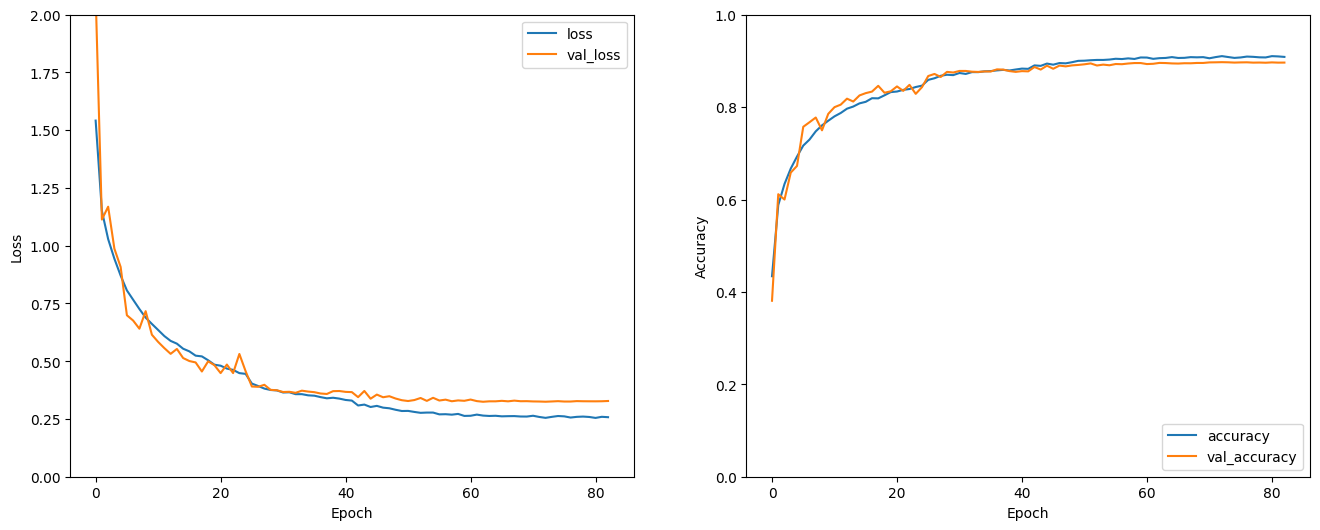

In [ ]:
numepochs = 90
batch_size = 64

model, history = train_tfmodel(numepochs, batch_size)

plot_trainhistory(history)